In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


2024-03-23 23:14:27.325570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 23:14:27.539154: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-23 23:14:28.211783: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.0/lib64:/usr/local/cuda-11.0/targets/x86_64-linux/lib//usr/local/cud

In [2]:
un_data=loadmat('MAT_AccelerationDataSet_DamageCase_0.mat')
done_data=loadmat('MAT_AccelerationDataSet_DamageCase_1.mat')
dtwo_data=loadmat('MAT_AccelerationDataSet_DamageCase_2.mat')
dot_data=loadmat('MAT_AccelerationDataSet_DamageCase_12.mat')


In [3]:
small_zero1 = np.load('small_zero1.npy')
small_one1 = np.load('small_one1.npy')
small_two1 = np.load('small_two1.npy')
small_three1 = np.load('small_three1.npy')

In [4]:
print(small_zero1)

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [1.99662026 1.94067076 2.48855664 ... 1.88769073 1.95571793
    1.74251145]
   [3.63772937 3.22149389 3.50883632 ... 3.22441751 2.73533765
    2.26451697]
   ...
   [3.7062138  2.96477705 3.613594   ... 4.23145169 3.12271131
    2.29706357]
   [3.77212412 3.3162753  3.92421577 ... 3.79032457 2.69222571
    2.68425638]
   [3.34159509 3.51737773 3.13912613 ... 3.5729691  3.20059718
    2.57817344]]

  [[1.99662026 1.94067076 2.48855664 ... 1.88769073 1.95571793
    1.74251145]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [2.20448315 2.41935151 1.84162729 ... 1.85083863 1.60306475
    1.67682151]
   ...
   [3.28886775 3.13242209 4.16658089 ... 3.93343611 3.35714851
    2.66642615]
   [3.25645617 3.10765859 4.37107124 ... 3.34011933 2.98260585
    2.83737211]
   [3.0804749  3.28864118 3.71241138 ... 3.39266519 3.2360235
    2.77726736]]

  [[3.63772937 3.22149389 3.50883632 ... 3.22441751

In [5]:
modify= np.concatenate((small_zero1,small_one1, small_two1, small_three1),axis=0)

In [6]:
modify.shape

(4000, 100, 100, 10)

In [7]:
print(small_two1[1,1,1,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
sample=1000
o_data=np.concatenate((np.ones((sample,))*0,np.ones((sample,)),
                       np.ones((sample,))*2,np.ones((sample,))*3),axis=0)

In [9]:
from sklearn.preprocessing import OneHotEncoder
o=o_data.reshape(len(o_data),1)
onehot_encoder=OneHotEncoder(sparse=False)
o=onehot_encoder.fit_transform(o)
o.shape

(4000, 4)

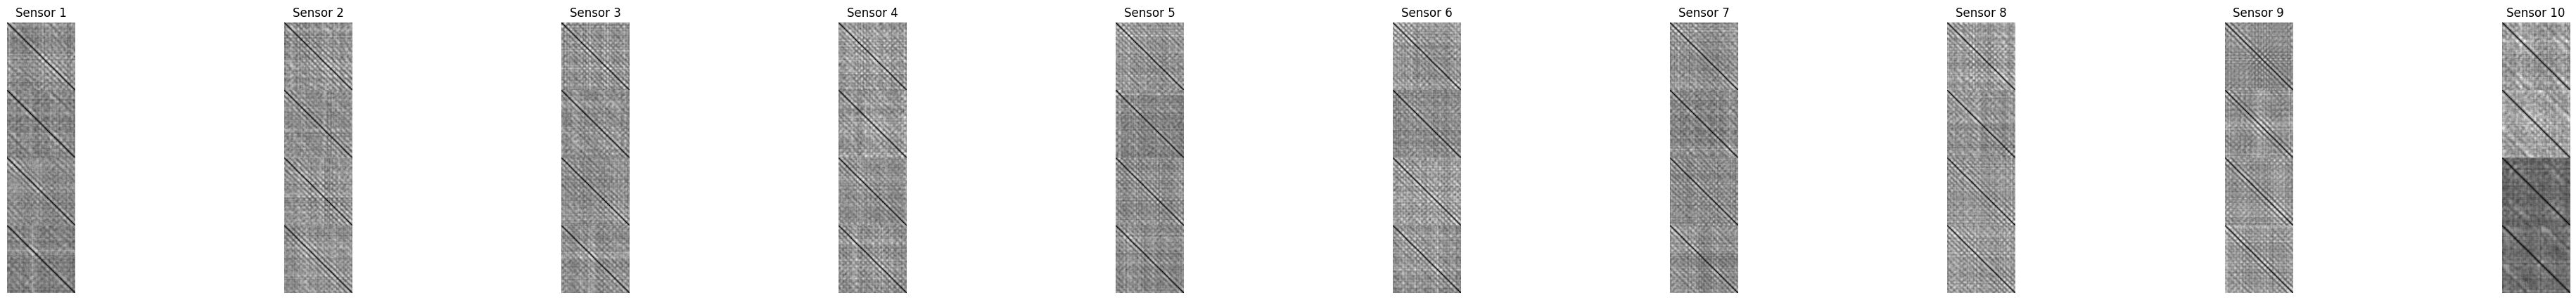

In [15]:
sensor_data0=modify[500] # One Sample of 500th number out of 1000 sample(Undamage). (one sample means 10 sensors data having each 3000 ts)
sensor_data1=modify[1500] # One Sample of 1500th number out of 1000 sample(damage). (one sample means 10 sensors data having each 3000 ts)
sensor_data2=modify[2500]
sensor_data3=modify[3500]
sensor_data=np.concatenate((sensor_data0,sensor_data1,sensor_data2,sensor_data3),axis=0)
# # sensor_data.shape
# # print("The shape of sensor data \n",sensor_data.shape)
# print("The sensor data \n",sensor_data)
# plt.imshow(sensor_data, cmap='gray')
# plt.legend(['sample0','sample1','sample2','sample3'])
# plt.show()
# df = pd.DataFrame(sensor_data)
# #print(df)
# df.to_csv('sensor_data.csv')
import matplotlib.pyplot as plt

# Assuming 'image_data' contains your transformed image data with shape (400, 100, 10)
num_sensors = sensor_data.shape[2]

fig, axs = plt.subplots(1, num_sensors, figsize=(num_sensors * 5, 5))
for i in range(num_channels):
    axs[i].imshow(sensor_data[:, :, i], cmap='gray')
    axs[i].set_title(f'Sensor {i+1}')
    axs[i].axis('off')
plt.show()


# 2D CNN Attention TFlite prediction for Raspberrypi 

In [11]:
# y_test.shape
# print(y_test.shape)
# print(y_test)
# display(y_test)

# test_data=train_data[2000:2999] #original batch processing place the real world input data in this either single sample(10 sensor, with each 3000 ts) or range of sample()
test_data=modify[1000:1001] #  place the real world input data in this either single sample(10 sensor, with each 3000 ts) 

X_test=test_data #(damage_1 data class of sample)
print("The X_text shape is \n",X_test.shape)
print("The X_text  is \n",X_test)
print("\nThe X_text type is: ",X_test.dtype)

The X_text shape is 
 (1, 100, 100, 10)
The X_text  is 
 [[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [1.7718506  2.01617492 2.25456547 ... 2.15317742 2.19952953
    1.33462393]
   [2.90908734 3.53356533 3.82383148 ... 3.71736986 4.11255852
    1.5458203 ]
   ...
   [4.70253141 3.21597508 3.66005354 ... 3.76553381 3.91860928
    3.20692971]
   [4.46950421 4.00250192 3.37596734 ... 3.45693962 4.26919161
    2.78013943]
   [4.16614325 4.22918947 3.14785127 ... 3.43057341 3.96622852
    2.90529435]]

  [[1.7718506  2.01617492 2.25456547 ... 2.15317742 2.19952953
    1.33462393]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [1.94747838 2.64752288 2.28066089 ... 2.55969041 2.66129022
    1.45330004]
   ...
   [4.0542015  3.64641    3.54215429 ... 3.65342497 3.72068988
    3.24114783]
   [3.75753506 4.37685593 3.45977052 ... 3.22334383 3.6828594
    2.78506153]
   [3.36539493 4.47403578 3.04235624 ... 3.48773443 3.15638332
    3.172856

In [12]:
# Load the TFLite model and allocate tensors and evaluate tflite model
interpreter = tf.lite.Interpreter(model_path = "2DCNN_tflite_model.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:",input_details[0]['shape'])
print("Input Type:",input_details[0]['dtype'])
print("Output Shape:",output_details[0]['shape'])
print("Output Type:",output_details[0]['dtype'])

Input Shape: [  1 100 100  10]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


In [13]:
# Load the TFLite model and allocate tensors.

interpreter.allocate_tensors()

###### Coverting the input data (float64) type matching withmodel data type i.e. (float32)
sensor_data=X_test
sensor_data.dtype
sensor_data=np.array(sensor_data,dtype=np.float32)
sensor_data.dtype

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


dtype('float32')

In [14]:
interpreter.set_tensor(input_details[0]['index'], sensor_data)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
print(tflite_model_predictions)
print("The Predicted Class is: ", prediction_classes)
if prediction_classes == 0:
    print(f"Data belongs to undamage class")
elif prediction_classes == 1:
    print(f"Data belongs to damage type 1")
elif prediction_classes == 2:
    print(f"Data belongs to damage type 2")    
else:
    print(f"Data belongs to damage type 3")

[[1.9618638e-07 9.9999976e-01 5.2095103e-11 2.8763807e-09]]
The Predicted Class is:  [1]
Data belongs to damage type 1


In [47]:
#acc = accuracy_score(prediction_classes, test_labels)
#print('Test accuracy TFLITE model:-', acc)
# Follow this for Tflite : https://www.youtube.com/watch?v=bKLL0tAj3GE&ab_channel=BhaveshBhatt